# Support Vector Machine (SVN)
*Support Vector Machines* sind Verfahren für überwachtes *Machine Learning*, die hauptsächlich für binäre Klassifizierung verwendet werden.
Die Trainingsdaten werden im n-dimensionalen Raum geplottet und der Algorithmus versucht, eine Grenze mit dem größtmöglichen Abstand zu der nächsten Stichprobe zu ziehen.

### Stützvektoren

![support vector](figures/support_vector.png)

Die Grenze ist mittels der ihr nächstliegenden Objekten definiert, welche deswegen auch *Stützvektoren* genannt werden. Vektoren, die von der Grenze weiter entfernt liegen sind für die Berechnung nicht entscheidend. Deswegen brauchen sie auch nicht in den Hauptspeicher geladen werden, was SV sehr speichereffizient macht.

### Hyperebenen
Wenn man über eine Grenze spricht, meint man eigenlich eine Hyperebene. Das ist ein Unterraum, dessen Dimension um 1 kleiner ist als seine Umgebung. Zum Beispiel im dreidimensionalen Raum, wäre eine Hyperebene eine zweidimensionale Ebene. Und im zweidimensionalen Raum wäre eine Hyperebene einfach eine gerade Linie.

Unten sind Beispiele für Hyperebenen im zwei- und dreidimensionalen Raum.

![](figures/2d_hyperplane.png)
![](figures/3d_hyperplane.png)

### Kernel-Trick
Daraus folgt aber, dass die Daten linear trennbar sein müssen, was für die meisten reallen Fälle nicht zutrifft. Deswegen kann man den sogenannten *Kernel-Trick* verwenden. Die Idee dahinter ist, den Vektorraum in einen höherdimensionalen Raum zu überführen, wo die Objekte linear trennbar sind und dort eine Hyperebene zu definieren. Bei der Rücktransformation, wird diese Hyperebene nichtlinear und oft auch nicht zusammenhängend.

Eines der Probleme ist der hohe Rechenaufwand, der bei der Vergrößerung der Dimensionen und der oft nicht intuitiven und nutzlosen Form der Hyperebene nach der Dimensionsreduktion auftritt. Um damit umzugehen, kann man geeignete Kernel-Funktionen verwenden, die nicht so rechenintensiv sind, aber dennoch die Hyperebene im hochdimensionalen Raum beschreiben können.

## Implementierung mit Python
Wir werden den [Irisdatensatz](https://en.wikipedia.org/wiki/Iris_flower_data_set) hier verwenden und als Bibliotheken benutzen wir `sklearn` und `numpy`. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Datensatz laden
data = load_iris()
features = np.array(data.data)
labels = np.array(data.target)

Typischerweise kann man einen SMV Konstruktur mit `svm = SVC()` erstellen. `SVC` steht für *Support Vector Classificator* und im Gegensatz zu *Support Vector Regressor* wird nur für Klassifikationsprobleme verwendet. Mit `svm.fit(features, labels)` trainiert man das Modell und mit `svm.predict()` erhält man die Vorhersagen für neue Stichprobe. 

Interessant an der Implementierung von SVM sind die Kernel-funktionen und  Konstruktorparameter, die man anpassen kann. Wir erklären diese Parameter und visualisieren die Unterschiede. Dazu müssen wir eine neue Funktion definieren.

In [3]:
def plot_data(X, y, kernel_fn="linear", C=1.0, degree=3, gamma='auto'):
    # 2 Grafiken nebeneinander zeigen
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11,3))
    
    for i in range(2):
        ax = [ax1, ax2][i]
        
        # 2 Mermale für die Anpassung verwenden
        svm = SVC(kernel=kernel_fn, C=C, degree=degree, gamma=gamma)
        svm.fit(X[:, 2*i:2*i+2] ,y)
        
        # Minimale und Maximale Werte aus X nehmen und ein
        # Matrix bilden mit alle Koordinaten mit Abstand 0.05
        x_min, x_max = X[:, 0 + (2 * i)].min() - 1, X[:, 0 + (2 * i)].max() + 1
        y_min, y_max = X[:, 1 + (2 * i)].min() - 1, X[:, 1 + (2 * i)].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.01))

        # Vorhersagen nehmen für alle Koordinaten
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

        # Hintergrund färben für jede Punkt aus xx,yy
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.summer)
        
        # Daten auch als Punkte plotten
        ax.scatter(X[:, 0 + (2 * i)], 
                   X[:, 1 + (2 * i)], 
                   c=y, cmap=plt.cm.summer, 
                   edgecolors='black')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
    
    ax1.set(ylabel='Sepalum Plot', 
            title = "Kernel Function: %s \n C: %.2f \n gamma: %s " % 
                  (kernel_fn, C, str(gamma)))
    ax2.set(ylabel='Petalum Plot')

    plt.show()

### Kernel-Funktion
Scikit-learn verfügt über einige Kernel-Funktionen, die man mit einer Zeichenfolge an den Konstruktor übergeben kann. Der einfachste ist der lineare Kernel, der nur dann gut funktioniert, wenn die Daten linear trennbar sind.

Dann gibt es den Polynomial-Kernel, in dem man zusätzliche Merkmale erstellt, deren Werte Kombinationen bereits existierender Merkmalen sind. Zum Beispiel ein Datensatz mit Merkmalen `[x. y, z]` erhält nach dem Anwenden des linearen Kernels ein zusätzliches Merkmal, und sieht folgendermaßen aus: `[x, y, z, x^3 + y^2 + x]`. Vielleicht könnte man die Daten mit Hilfe dieser neunen Dimension besser klassifizieren.

Der am häufigsten verwendete Kernel ist `rbf` (*radial basis function*), der auch als Gauss-Kernel bezeichnet wird. Die einfachste Beschreibung seiner Funktionalität ist zu sagen, dass man Cluster um die verschiedenen Klassen findet.

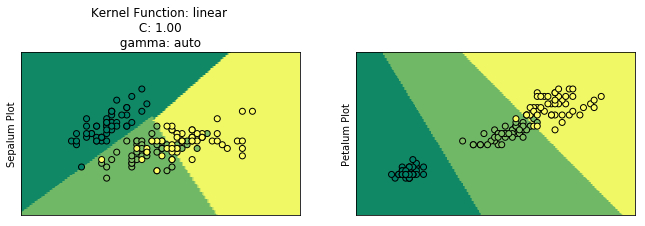

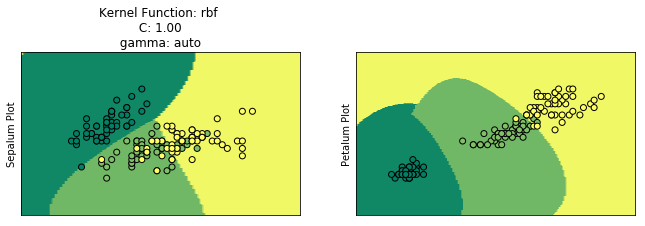

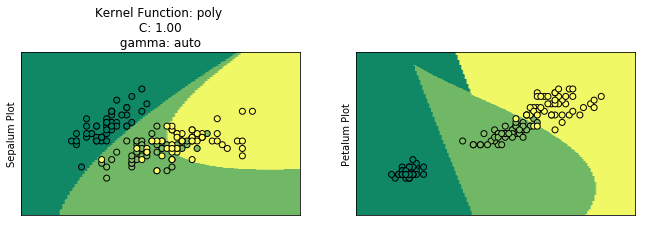

In [4]:
# hier Kernelfunktion anpassen - 'linear', 'poly' and 'rbf'
plot_data(features, labels, kernel_fn="linear")
plot_data(features, labels, kernel_fn="rbf")
plot_data(features, labels, kernel_fn="poly")

### Gamma

Der `gamma` Parameter wird für nichtlineare SVM verwendet und bestimmt, wie weit der Einfluss jeder einzelnen Stichprobe ist. Mit einem kleineren Gamma sieht das Modell wie eine SVM mit einem linearem Kernel aus, weil man nicht gut seine Komplexität bezeichnen kann. Ein großer Gamma bedeutet, dass die Stützvektoren nur sich selbst beschreiben und dies auch eine starke Überanpassung bewirkt.

Falls `auto` als Gamma-Parameter eingegeben wird, wird das Gamma `1/n_merkmale` sein.

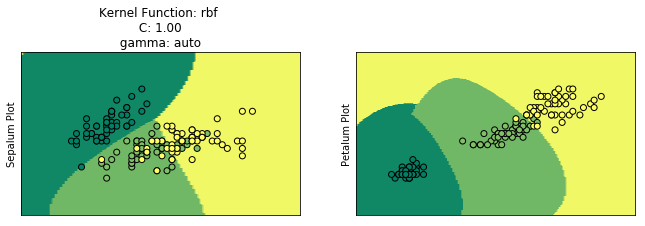

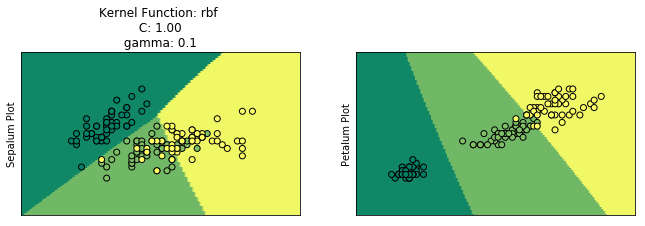

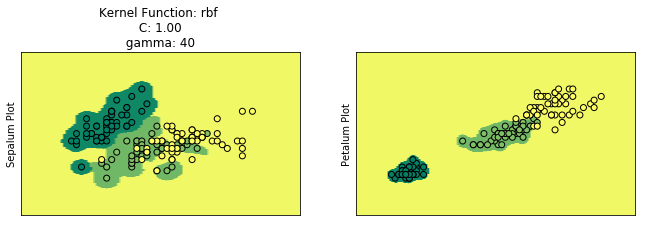

In [5]:
plot_data(features, labels, kernel_fn="rbf", gamma='auto')
plot_data(features, labels, kernel_fn="rbf", gamma=0.1)
plot_data(features, labels, kernel_fn="rbf", gamma=40)

### Strafparameter (C)

Der C-Parameter ist die Kost der Klassifizierung und bestimmt die Größe der Strafe, wenn eine Stichprobe falsch klassifiziert wird. Bei einem großen C-Wert wird das Modell streng bestrafft für jede falsche Klassifizierung. Dies führt zu komplexeren Modellen, aber auch zu einer größeren Überanpassungsefahr. Ein kleines C bietet eine glattere Entscheidungsebene, aber Ausreißer werden deshalb falsch klassifiziert.

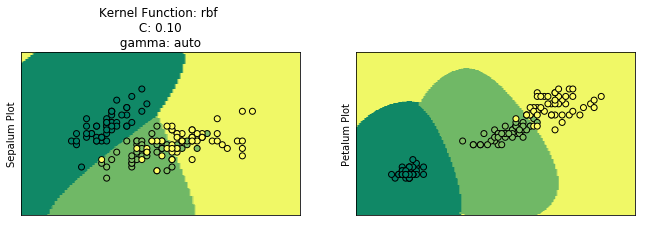

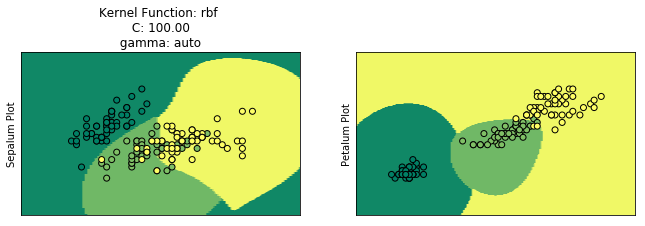

In [6]:
plot_data(features, labels, kernel_fn="rbf", C=0.1)
plot_data(features, labels, kernel_fn="rbf", C=100)

## Vor- und Nachteile
### Vorteile
- effektiv in hochdimensionalen Vektorräumen
- effektiv, auch wenn man mehr Merkmale als Stichproben hat
- Speichereffizient - man benötigt nur die Stützvektoren im Speicher

### Nachteile
- nicht effizient für große Datensätze, weil die Trainingszeit so viel länger ist
- nicht effektiv, wenn sich Klassen überschneiden
- liefert keine Wahrscheinlichkeitsschätzungen

## Ressourcen
- Git Repository mit dem kompletten Code - [Link](https://github.com/emomicrowave/machine-learning-tutorials/tree/master/05-support_vector_machines)
- Logistische Regression vs. Decision Trees vs. Support Vector Machines - [Link](https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part1/)